# Using Supervised Learning to Predict Football Wins
## By Arjun Ganesan and Daniel Ngo

### File Parsing

In [7]:
import csv, operator


def parse_csv(file_name):

    all_rows = []

    with open(file_name, "r") as file:
        reader = csv.reader(file)
        for row in reader:
            all_rows.append(row[3:])

    all_rows.pop(0)

    return all_rows


def parse_defensive_advanced(stats, file_name):
    all_rows = parse_csv(file_name)

    for i, row in enumerate(all_rows):
        # Quarterback (QB) pressures per drop back
        # print(str(i))
        stats[i][0] = float(row[14].strip("%")) / 100


def parse_defensive_drives(stats, file_name):
    all_rows = parse_csv(file_name)

    for i, row in enumerate(all_rows):
        # percentage of offensive drives ending in score
        stats[i][1] = float(row[2].strip("%")) / 100
        # percentage of offensive drives ending in turnover
        stats[i][2] = float(row[3].strip("%")) / 100


def parse_defensive_passing(stats, file_name):
    all_rows = parse_csv(file_name)

    for i, row in enumerate(all_rows):
        # percentage of attempted passes by offensive team intercepted
        stats[i][3] = float(row[8].strip("%")) / 100


def parse_offensive_drives(stats, file_name):
    all_rows = parse_csv(file_name)

    for i, row in enumerate(all_rows):
        # percentage of offensive drives ending in score
        stats[i][4] = float(row[2].strip("%")) / 100
        # percentage of offensive drives ending in turnover
        stats[i][5] = float(row[3].strip("%")) / 100
        # avg number of points scored per drive
        stats[i][6] = float(row[8]) / 100


def parse_offensive_passing(stats, file_name):
    all_rows = parse_csv(file_name)

    for i, row in enumerate(all_rows):
        # pass completion
        stats[i][7] = float(row[2].strip("%")) / 100
        # adjusted yards gained per pass attempt
        stats[i][8] = float(row[10])


def parse_offensive_rushing(stats, file_name):
    all_rows = parse_csv(file_name)

    for i, row in enumerate(all_rows):
        # yards gained per attempt
        stats[i][9] = float(row[4])


def get_wins(stats, file_name):
    wins = csv.reader(open(file_name), delimiter=",")
    # sorts each row by the Team Name
    wins = sorted(wins, key=operator.itemgetter(0))
    # gets rid of label row (which ends up being the 2nd to last row after sorting)
    wins.pop(-2)

    for i, row in enumerate(wins):
        stats[i][10] = float(row[1])


training_examples = [[0] * 11 for i in range(32)]
parse_defensive_advanced(training_examples, "Raw Data/2021_Data/DefensiveAdvanced.csv")
parse_defensive_drives(training_examples, "Raw Data/2021_Data/DefensiveDrives.csv")
parse_defensive_passing(training_examples, "Raw Data/2021_Data/DefensivePassing.csv")
parse_offensive_drives(training_examples, "Raw Data/2021_Data/DefensivePassing.csv")
parse_offensive_passing(training_examples, "Raw Data/2021_Data/OffensivePassing.csv")
parse_offensive_rushing(training_examples, "Raw Data/2021_Data/OffensiveRushing.csv")
get_wins(training_examples, "Raw Data/2021_Data/2021_Standings.csv")

validation_examples = [[0] * 11 for i in range(32)]
parse_defensive_advanced(
    validation_examples, "Raw Data/2020_Data/DefensiveAdvanced.csv"
)
parse_defensive_drives(validation_examples, "Raw Data/2020_Data/DefensiveDrives.csv")
parse_defensive_passing(validation_examples, "Raw Data/2020_Data/DefensivePassing.csv")
parse_offensive_drives(validation_examples, "Raw Data/2020_Data/DefensivePassing.csv")
parse_offensive_passing(validation_examples, "Raw Data/2020_Data/OffensivePassing.csv")
parse_offensive_rushing(validation_examples, "Raw Data/2020_Data/OffensiveRushing.csv")
get_wins(validation_examples, "Raw Data/2020_Data/2020_Standings.csv")

print("Training Examples (2021 Data): " + str(training_examples))
print()
print("Validation Examples (2020 Data): " + str(validation_examples))


Training Examples (2021 Data): [[0.259, 0.35600000000000004, 0.153, 0.023, 0.654, 36.45, 0.023, 0.7020000000000001, 7.9, 4.2, 11.0], [0.16699999999999998, 0.447, 0.11199999999999999, 0.021, 0.6779999999999999, 39.52, 0.021, 0.6579999999999999, 6.5, 3.7, 7.0], [0.23, 0.342, 0.079, 0.013999999999999999, 0.639, 47.42, 0.013999999999999999, 0.648, 6.3, 4.8, 8.0], [0.308, 0.28, 0.145, 0.036000000000000004, 0.56, 27.71, 0.036000000000000004, 0.634, 6.8, 4.8, 11.0], [0.261, 0.376, 0.081, 0.017, 0.654, 32.66, 0.017, 0.581, 4.9, 4.0, 5.0], [0.231, 0.40399999999999997, 0.084, 0.017, 0.6579999999999999, 32.57, 0.017, 0.613, 5.6, 4.2, 6.0], [0.245, 0.33899999999999997, 0.111, 0.021, 0.6709999999999999, 42.22, 0.021, 0.6920000000000001, 8.8, 4.0, 10.0], [0.243, 0.374, 0.099, 0.023, 0.637, 34.39, 0.023, 0.615, 6.6, 5.1, 8.0], [0.276, 0.325, 0.16699999999999998, 0.042, 0.595, 40.49, 0.042, 0.6859999999999999, 8.1, 4.5, 12.0], [0.259, 0.327, 0.107, 0.023, 0.607, 36.52, 0.023, 0.654, 7.1, 4.5, 7.0], [0

### K Nearest Neighbors

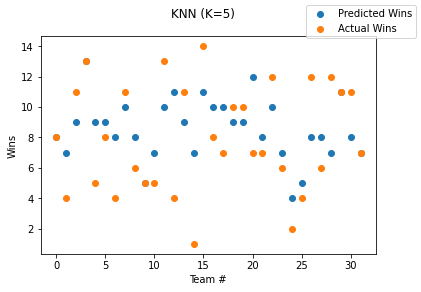

[ 8.  7.  9. 13.  9.  9.  8. 10.  8.  5.  7. 10. 11.  9.  7. 11. 10. 10.
  9.  9. 12.  8. 10.  7.  4.  5.  8.  8.  7. 11.  8.  7.]
RMSE: 2.888555002072836


In [8]:
import numpy as np
import matplotlib.pyplot as plt


def euclidean_distance(p1, p2):
    squares = 0

    # sums up the distance between each corresponding dimension of the coordinates
    for i in range(len(p1)):
        squares += np.square(p1[i] - p2[i])

    distance = np.sqrt(squares)
    return distance


def k_nearest_neighbors_real_value(k, point_to_classify, training_examples, weighted):

    # keys -> example, value -> distance
    distances = {}

    # get distances between each of the training examples and point_to_classify
    for example in training_examples:
        distances[tuple(example)] = euclidean_distance(point_to_classify, example)

    # sorts dictionary by distances from least to greatest
    sorted_distances = dict(sorted(distances.items(), key=lambda item: item[1]))
    # print(sorted_distances)
    # keeps track of the sum of the outputs for the k-nearest neighbors
    sum = 0
    # keeps track of the weights of the k-nearest neighbors
    ws = []

    # for the k-nearest neighbors...
    for i in range(k):
        if weighted:
            wi = 1 / np.square(list(sorted_distances.values())[i])
            ws.append(wi)
            sum += wi * list(sorted_distances)[i][10]
        else:
            sum += list(sorted_distances)[i][10]

    # returns averages
    if weighted:
        return sum / np.sum(ws)
    else:
        return sum / k


def rmse(predictions, real_values):
    return np.sqrt(
        np.mean(
            [
                np.square(real_value - prediction)
                for real_value, prediction in zip(real_values, predictions)
            ]
        )
    )


predicted_wins = np.round(
    [
        k_nearest_neighbors_real_value(5, team_data[:-1], training_examples, True)
        for team_data in validation_examples
    ]
)

actual_wins = [validation_example[-1] for validation_example in validation_examples]

ex_nums = [i for i in range(len(predicted_wins))]

fig = plt.figure()

plt.scatter(ex_nums, predicted_wins, label="Predicted Wins")
plt.scatter(
    ex_nums,
    actual_wins,
    label="Actual Wins",
)
fig.suptitle("KNN (K=5)")
plt.xlabel("Team #")
plt.ylabel("Wins")
fig.legend()
plt.show()

print(predicted_wins)
print("RMSE: {}".format(rmse(predicted_wins, actual_wins)))


## Gradient Descent Linear Regression

[0.05531243238520076, 0.11213573682067751, -0.1538762815205723, 0.10831174842271384, 0.019860869098982162, -0.05375583115410312, -0.1462032249976481, 0.019860869098982162, 0.1031086594803478, 1.9643187280893812, 0.10439092311036849]


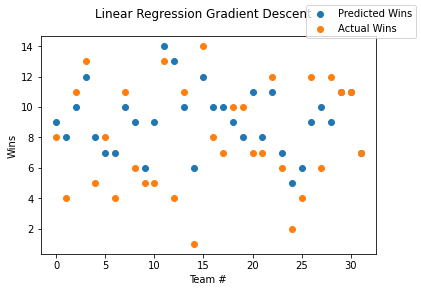

[ 9.  8. 10. 12.  8.  7.  7. 10.  9.  6.  9. 14. 13. 10.  6. 12. 10. 10.
  9.  8. 11.  8. 11.  7.  5.  6.  9. 10.  9. 11. 11.  7.]
RMSE: 2.8559149146989657


In [9]:
import numpy as np
import matplotlib.pyplot as plt


def linear_gradient_descent(
    num_of_attributes, x_examples, y_examples, LEARNING_RATE=1e-5, delta_stop=1e-5
):
    ws = [0] * (num_of_attributes + 1)
    stop_condition_met = False

    while not stop_condition_met:
        deltas = [0] * len(ws)

        for x_example, y_example in zip(x_examples, y_examples):
            output = np.dot(ws[1:], x_example) + ws[0]

            for i, delta in enumerate(deltas):
                if i == 0:
                    deltas[i] = deltas[i] + LEARNING_RATE * (y_example - output) * 1
                else:
                    deltas[i] = (
                        deltas[i]
                        + LEARNING_RATE * (y_example - output) * x_example[i - 1]
                    )
            # print("Deltas: {}".format(deltas))
            stop_condition_met = True
        for i, w in enumerate(ws):
            ws[i] = ws[i] + deltas[i]
            if deltas[i] > delta_stop:
                stop_condition_met = False

    print(ws)
    return ws


def get_predictions_from_weights(ws, x_examples):
    predictions = [0] * len(x_examples)

    for i, prediction in enumerate(predictions):
        predictions[i] = np.dot(ws[1:], x_examples[i]) + ws[0]

    return predictions


weights = linear_gradient_descent(
    10,
    [training_example[:-1] for training_example in training_examples],
    [training_example[-1] for training_example in training_examples],
)

predicted_wins = np.round(
    get_predictions_from_weights(
        weights, [validation_example[:-1] for validation_example in validation_examples]
    )
)

actual_wins = [validation_example[-1] for validation_example in validation_examples]

ex_nums = [i for i in range(len(predicted_wins))]

fig = plt.figure()

plt.scatter(ex_nums, predicted_wins, label="Predicted Wins")
plt.scatter(
    ex_nums,
    actual_wins,
    label="Actual Wins",
)

fig.suptitle("Linear Regression Gradient Descent")
plt.xlabel("Team #")
plt.ylabel("Wins")
fig.legend()
plt.show()

print(predicted_wins)
print("RMSE: {}".format(rmse(predicted_wins, actual_wins)))


# Regression Tree

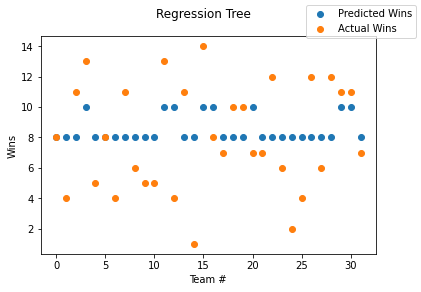

[ 8.  8.  8. 10.  8.  8.  8.  8.  8.  8.  8. 10. 10.  8.  8. 10. 10.  8.
  8.  8. 10.  8.  8.  8.  8.  8.  8.  8.  8. 10. 10.  8.]
RMSE: 3.2739502134271987


In [35]:
class TreeNode:
    def __init__(self):
        self.left = None
        self.right = None
        self.split_column = -1
        self.split = -1
        self.prediction = -1
        self.ssr = float("inf")
        self.is_leaf_node = False


def find_ssr(observations, column_num, split, lt_num, gt_num):
    lt_sum = 0
    gt_sum = 0
    for observation in observations:
        if observation[column_num] < split:
            lt_sum += observation[-1]
        else:
            gt_sum += observation[-1]
    lt_prediction = lt_sum / lt_num
    gt_prediction = gt_sum / gt_num

    return [
        np.sum(
            [
                np.square(observation[column_num] - lt_prediction)
                if observation[column_num] < split
                else np.square(observation[column_num] - gt_prediction)
                for observation in observations
            ]
        ),
        lt_prediction,
        gt_prediction,
    ]


def find_best_split(observations):
    # best_split[0]=SSR, best_split[1]=column(attribute) #, best_split[2]=split value, best_split[3]=observations less than split,
    # best_split[4]=observations greater than split, best_split[5]=lt_prediction, best_split[6]=gt_prediction
    best_split = [float("inf"), -1, 0, 0, 0, 0, 0]
    # enumerating over all the columns(attributes)
    # print(observations[0])
    for i in range(len(observations[0]) - 1):
        # sorts observations by column (attribute) i
        sorted_observations = sorted(
            observations, key=lambda observation: observation[i]
        )

        # enumerates over all but the last observation (because we are always indexing the current observation and as the next one)
        for j, _ in enumerate(sorted_observations[:-1]):
            # chooses split values that are between observation values
            split = np.mean([sorted_observations[j][i], sorted_observations[j + 1][i]])
            ssr = find_ssr(
                observations, i, split, j + 1, len(sorted_observations) - (j + 1)
            )

            if best_split[0] > ssr[0]:
                # print(ssr[0])
                best_split = [
                    ssr[0],
                    i,
                    split,
                    sorted_observations[: j + 1],
                    sorted_observations[j + 1 :],
                    ssr[1],
                    ssr[2],
                ]
    # print(best_split)
    return best_split


def grow_tree(root, observations, min_num_of_observations_per_split=2, min_ssr_delta=5):
    while True:
        split_info = find_best_split(observations)
        if (
            len(split_info[3]) < min_num_of_observations_per_split
            or len(split_info[4]) < min_num_of_observations_per_split
            or root.ssr - split_info[0] < min_ssr_delta
        ):
            # leaf nodes that only hold predictions and do not hold splits
            root.left = TreeNode()
            root.left.prediction = split_info[5]
            root.left.is_leaf_node = True

            root.right = TreeNode()
            root.right.prediction = split_info[6]
            root.right.is_leaf_node = True

        root.split_column = split_info[1]
        root.split = split_info[2]
        root.ssr = split_info[0]
        root.is_leaf_node = False

        if (
            root.left
            and root.right
            and (root.left.is_leaf_node or root.right.is_leaf_node)
        ):
            break

        root.left = TreeNode()
        root.left = grow_tree(root.left, split_info[3])

        root.right = TreeNode()
        root.right = grow_tree(root.right, split_info[4])

    return root


def get_predictions_from_tree(root, observations):
    predictions = []
    for observation in observations:
        current_node = root

        while not current_node.is_leaf_node:
            if observation[current_node.split_column] < current_node.split:
                current_node = current_node.left
            else:
                current_node = current_node.right

        predictions.append(current_node.prediction)

    return predictions


root = grow_tree(TreeNode(), training_examples)

predicted_wins = np.round(
    get_predictions_from_tree(
        root, [validation_example[:-1] for validation_example in validation_examples]
    )
)

actual_wins = [validation_example[-1] for validation_example in validation_examples]

ex_nums = [i for i in range(len(predicted_wins))]

fig = plt.figure()

plt.scatter(ex_nums, predicted_wins, label="Predicted Wins")
plt.scatter(
    ex_nums,
    actual_wins,
    label="Actual Wins",
)

fig.suptitle("Regression Tree")
plt.xlabel("Team #")
plt.ylabel("Wins")
fig.legend()
plt.show()

print(predicted_wins)
print("RMSE: {}".format(rmse(predicted_wins, actual_wins)))


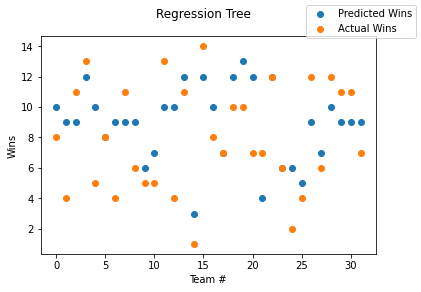

6
20
[10.  9.  9. 12. 10.  8.  9.  9.  9.  6.  7. 10. 10. 12.  3. 12. 10.  7.
 12. 13. 12.  4. 12.  6.  6.  5.  9.  7. 10.  9.  9.  9.]
RMSE: 2.7950849718747373


In [27]:
from sklearn.tree import DecisionTreeRegressor

rt = DecisionTreeRegressor()

rt.fit([training_example[:-1] for training_example in training_examples], [training_example[-1] for training_example in training_examples])

predicted_wins = rt.predict([validation_example[:-1] for validation_example in validation_examples])

actual_wins = [validation_example[-1] for validation_example in validation_examples]

ex_nums = [i for i in range(len(predicted_wins))]

fig = plt.figure()

plt.scatter(ex_nums, predicted_wins, label="Predicted Wins")
plt.scatter(
    ex_nums,
    actual_wins,
    label="Actual Wins",
)

fig.suptitle("Regression Tree")
plt.xlabel("Team #")
plt.ylabel("Wins")
fig.legend()
plt.show()

print(rt.get_depth())
print(rt.get_n_leaves())
print(predicted_wins)
print("RMSE: {}".format(rmse(predicted_wins, actual_wins)))